In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# 初始化 WordNet 詞形還原器與停用詞
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Dataset/IMDB_Dataset.csv'
data = pd.read_csv(file_path)

columns_list = data.columns.tolist()
print(columns_list)

['review', 'sentiment']


In [6]:
print(data.shape)

(50000, 2)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [8]:
review = data['review']
print(review.head())

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object


In [9]:
statistics = data.describe()
print(statistics)

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


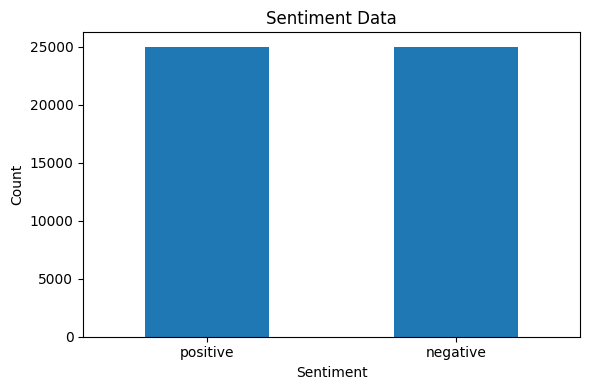

In [10]:
# 計算 'sentiment' 欄位資料的分佈
sentiment_distribution = data['sentiment'].value_counts()

# 繪製 'sentiment' 欄位的柱狀圖
plt.figure(figsize=(6, 4))  # 設定圖表大小
sentiment_distribution.plot(kind='bar')  # 繪製柱狀圖，設定顏色等
plt.title('Sentiment Data')  # 圖表標題
plt.xlabel('Sentiment')  # x軸標籤
plt.ylabel('Count')  # y軸標籤
#plt.grid(axis='y')  # 顯示y軸格線
plt.xticks(rotation=0)  # 旋轉x軸標籤，使其更易讀
plt.tight_layout()  # 調整圖表格式，使其更加美觀
plt.show()  # 顯示圖表


In [ ]:
# 文本預處理函數，將評論轉換為小寫、去除標點符號、標記化、詞形還原等操作
def transform_data(review):
    # 使用BeautifulSoup移除HTML標記
    review = BeautifulSoup(review, "html.parser").get_text()
    # 將文本轉換為小寫
    review = review.lower()
    # 移除非字母字符
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    # 將文本分詞
    tokens = nltk.word_tokenize(review)
    # 進行詞形還原並移除停用詞
    review = [lm.lemmatize(token) for token in tokens if token not in stop_words]
    # 將處理後的單詞組合成一個文本字串
    review = " ".join(review)
    return review

In [12]:
# 將文本資料進行預處理
tranformed_rev = data.review.apply(transform_data)

<ipython-input-11-7da09269d1b0>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review, "html.parser").get_text()


In [13]:
# 資料視覺化：建立正面和負面情緒的詞雲和詞頻分析
transformed_data = pd.DataFrame({"t_rev": tranformed_rev, "sentiment": data['sentiment']})

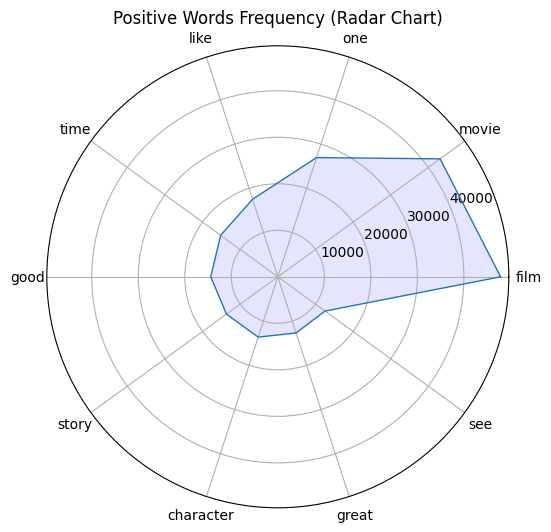

In [15]:
import math
# 提取正面情緒詞的詞頻字典
positive_tokens = transformed_data[transformed_data.sentiment == 'positive'].t_rev.str.split(expand=True).stack()
positive_word_freq = positive_tokens.value_counts().head(10).to_dict()  # 取前10個詞彙的頻率，這裡你可以自行調整取得的詞彙數量

# 創建正面情緒詞的雷達圖
plt.figure(figsize=(8, 6))

categories = list(positive_word_freq.keys())
values = list(positive_word_freq.values())

num_categories = len(categories)
pi = 3.1415926
angles = [n / float(num_categories) * 2 * math.pi for n in range(num_categories)]
values += values[:1]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='black', size=10)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title("Positive Words Frequency (Radar Chart)")
plt.show()
